<a href="https://colab.research.google.com/github/vishwaskv01/deeplearning/blob/main/Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6755 - loss: 1.0329 - val_accuracy: 0.8346 - val_loss: 0.5048
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8231 - loss: 0.5084 - val_accuracy: 0.8484 - val_loss: 0.4509
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8384 - loss: 0.4626 - val_accuracy: 0.8334 - val_loss: 0.4639
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8513 - loss: 0.4286 - val_accuracy: 0.8640 - val_loss: 0.4075
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8580 - loss: 0.4039 - val_accuracy: 0.8668 - val_loss: 0.3825


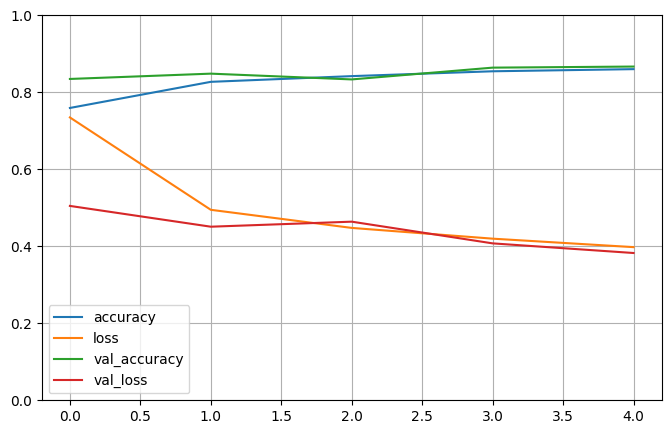

In [ ]:
#1
import tensorflow as tf
from tensorflow import keras
fashion_dataset = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_dataset.load_data()

x_valid ,x_train = x_train[:5000]/255.0 , x_train[5000:]/255.0
y_valid ,y_train = y_train[:5000] , y_train[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()


model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))


import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8396 - loss: 72.7819


[75.79771423339844, 0.835099995136261]

In [ ]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
y_predict = model.predict(x_new)
y_pred_classes = np.argmax(y_predict,axis = 1)
y_pred_classes
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
predict_class=np.array(class_names)[y_pred_classes]
predict_class

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8366 - loss: 62.3936
Accuracy: 82.91


Xscaled=x-Mean/sd

In [ ]:
#2
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras


housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)
y_pred

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3837 - val_loss: 0.5334
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5136 - val_loss: 0.5038
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4617 - val_loss: 0.4658
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4633 - val_loss: 0.4681
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4812 - val_loss: 0.4667
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4556 - val_loss: 0.4493
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4518 - val_loss: 0.4459
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4344 - val_loss: 0.4348
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4452 - val_loss: 0.4358
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4170 - val_loss: 0.4431
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4192 - val_loss: 0.4250
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0

array([[1.7899175],
       [1.9078903],
       [0.8256446]], dtype=float32)

In [ ]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2563 - val_loss: 0.7361
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5119 - val_loss: 80.5941
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.2952 - val_loss: 0.4100
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4370 - val_loss: 0.3792
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4055 - val_loss: 0.3802
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4130 - val_loss: 0.3667
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3826 - val_loss: 0.3776
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4065 - val_loss: 0.3604
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3893 - val_loss: 0.3608
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3823 - val_loss: 0.3627
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3776 - val_loss: 0.3564
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model.predict(X_test))
print(f"R-squared: {r2}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
R-squared: 0.7125257151640663


In [ ]:
input=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input],outputs=[output])
model

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 30)             │            270 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 30)             │            930 │ dense_23[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 38)             │              0 │ input_layer_10[0][0],  │
│ (Concatenate)             │                        │                │ dense_24[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 1)              │             39 │ concatenate_3[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()
x_valid,x_train=x_train_full[:5000]/255.0,x_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_names[y_train[0]]
x_new=x_test[:3]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value=0, max_value=10, default=2)
  n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
  learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
  optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
  if optimizer == "sgd":
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model=tf.keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28,28]))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons,activation="relu"))
  model.add(keras.layers.Dense(10,activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
  return model

In [ ]:
from re import X
random_search_tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    overwrite=True,
    directory="my_fashion_mnsit",
    project_name="my_rnd_search", seed=42
)
random_search_tuner.search(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))
top3models=random_search_tuner.get_best_models(num_models=3)
best_model=top3models[0]
top3_params=random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params=top3_params[0]
best_trail=random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trail.summary()
best_trail.metrics.get_last_value("val_accuracy")
best_model.fit(x_train_full, y_train_full, epochs=5)
test_loss,test_accuracy=best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.3f}")
best_model.summary()

Trial 10 Complete [00h 00m 45s]
val_accuracy: 0.8751999735832214

Best val_accuracy So Far: 0.8870000243186951
Total elapsed time: 00h 06m 13s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Trial 08 summary
Hyperparameters:
n_hidden: 9
n_neurons: 124
learning_rate: 0.0005509513888645584
optimizer: adam
Score: 0.8870000243186951
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8542 - loss: 2.3665
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8903 - loss: 0.3038
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8905 - loss: 0.3039
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8902 - loss: 0.3082
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8913 - loss: 0.3037
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8660 - loss: 0.4020
Test accuracy: 0.865


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 124)                 │          97,340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 124)                 │          15,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 124)                 │          15,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 124)                 │          15,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 124)                 │          15,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 124)                 │          15,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 124)                 │          15,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 124)                 │          15,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 124)                 │          15,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 667,772 (2.55 MB)

 Trainable params: 222,590 (869.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 445,182 (1.70 MB)

In [ ]:
import numpy as np

def unitStep(v):
  if v>=0:
    return 1
  else:
    return 0

def perceptronModel(x,w,b):
  v = np.dot(w,x)+b
  y = unitStep(v)
  return y

#wnot = -1, bnot = 0.5
def NOT_logicFunction(x):
  wNOT = -1
  bNOT = 0.5
  return perceptronModel(x,wNOT,bNOT)

#here w1 =wand1 = 1, w2= wand2 = 1, band =-1.5
def AND_logicFunction(x):
  w = np.array([1,1])
  bAND = -1.5
  return perceptronModel(x,w,bAND)
def OR_logicFunction(x):
  w = np.array([1,1])
  bOR = -0.5
  return perceptronModel(x,w,bOR)
def XOR_logicFunction(x):
  y1 = AND_logicFunction(x)
  y2 = OR_logicFunction(x)
  y3 = NOT_logicFunction(y1)
  final_x = np.array([y2,y3])
  finalOutput = AND_logicFunction(final_x)
  return finalOutput

test1 = np.array([0,1])
test2 = np.array([1,1])
test3 = np.array([0,0])
test4 = np.array([1,0])

print("XOR({}, {}) = {}".format(0,1,XOR_logicFunction(test1)))
print("XOR({}, {}) = {}".format(1,1,XOR_logicFunction(test2)))
print("XOR({}, {}) = {}".format(0,0,XOR_logicFunction(test3)))
print("XOR({}, {}) = {}".format(1,0,XOR_logicFunction(test4)))

XOR(0, 1) = 1
XOR(1, 1) = 0
XOR(0, 0) = 0
XOR(1, 0) = 1


In [ ]:
import numpy as np

def unitStep(v):
  if v>=0:
    return 1
  else:
    return 0

def perceptronModel(x,w,b):
  v = np.dot(w,x)+b
  y = unitStep(v)
  return y

# New weights for NOT gate
def NOT_logicFunction(x):
  wNOT = -2
  bNOT = 1
  return perceptronModel(x,wNOT,bNOT)

# New weights for AND gate
def AND_logicFunction(x):
  w = np.array([2,2])
  bAND = -2.5
  return perceptronModel(x,w,bAND)

def OR_logicFunction(x):
  w = np.array([2,2])
  bOR = -1
  return perceptronModel(x,w,bOR)

def XOR_logicFunction(x):
  y1 = AND_logicFunction(x)
  y2 = OR_logicFunction(x)
  y3 = NOT_logicFunction(y1)
  final_x = np.array([y2,y3])
  finalOutput = AND_logicFunction(final_x)
  return finalOutput

test1 = np.array([0,1])
test2 = np.array([1,1])
test3 = np.array([0,0])
test4 = np.array([1,0])

print("XOR({}, {}) = {}".format(0,1,XOR_logicFunction(test1)))
print("XOR({}, {}) = {}".format(1,1,XOR_logicFunction(test2)))
print("XOR({}, {}) = {}".format(0,0,XOR_logicFunction(test3)))
print("XOR({}, {}) = {}".format(1,0,XOR_logicFunction(test4)))

XOR(0, 1) = 1
XOR(1, 1) = 0
XOR(0, 0) = 0
XOR(1, 0) = 1


In [ ]:
import numpy as np

def unitStep(v):
    return 1 if v >= 0 else 0

def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    return unitStep(v)

def train_perceptron(X, y, w, b, learning_rate=0.1, epochs=10):
    weights = w
    bias = b
    for epoch in range(epochs):
        for i in range(len(X)):
            y_pred = perceptronModel(X[i], weights, bias)
            error = y[i] - y_pred
            if error != 0:
                weights += learning_rate * error * X[i]
                bias += learning_rate * error
    return weights, bias

def NOT_logicFunction(x, wNOT, bNOT):
    return perceptronModel(x, wNOT, bNOT)

def AND_logicFunction(x, w1, bAND):
    return perceptronModel(x, w1, bAND)

def OR_logicFunction(x, w2, bOR):
    return perceptronModel(x, w2, bOR)

def XOR_logicFunction(x):
    # Train NOT gate
    wNOT = np.array([-1])
    bNOT = 0.5
    x1 = np.array([0, 1])
    y1 = np.array([1, 0])
    wNOT, bNOT = train_perceptron(x1.reshape(-1, 1), y1, wNOT, bNOT)

    # Train AND gate
    w1 = np.array([1, 1])
    bAND = -1.5
    y2 = np.array([0, 0, 0, 1])
    w1, bAND = train_perceptron(X, y2, w1, bAND)

    # Train OR gate
    w2 = np.array([1, 1])
    bOR = -0.5
    y3 = np.array([0, 1, 1, 1])
    w2, bOR = train_perceptron(X, y3, w2, bOR)

    # Compute the XOR output
    y11 = AND_logicFunction(x, w1, bAND)
    y12 = OR_logicFunction(x, w2, bOR)
    y13 = NOT_logicFunction(y11, wNOT, bNOT)
    final_x = np.array([y12, y13])
    finalOutput = AND_logicFunction(final_x, w1, bAND)
    return finalOutput

# Input data for XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Test XOR logic function
for i in range(len(X)):
    print(f"XOR({X[i][0]}, {X[i][1]}) = {XOR_logicFunction(X[i])}")


XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD:
Epoch 1/50, Loss: 1.1471
Epoch 2/50, Loss: 1.0717
Epoch 3/50, Loss: 1.0553
Epoch 4/50, Loss: 1.0438
Epoch 5/50, Loss: 1.0385
Epoch 6/50, Loss: 1.0338
Epoch 7/50, Loss: 1.0323
Epoch 8/50, Loss: 1.0284
Epoch 9/50, Loss: 1.0271
Epoch 10/50, Loss: 1.0255
Epoch 11/50, Loss: 1.0244
Epoch 12/50, Loss: 1.0221
Epoch 13/50, Loss: 1.0198
Epoch 14/50, Loss: 1.0197
Epoch 15/50, Loss: 1.0169
Epoch 16/50, Loss: 1.0168
Epoch 17/50, Loss: 1.0149
Epoch 18/50, Loss: 1.0141
Epoch 19/50, Loss: 1.0122
Epoch 20/50, Loss: 1.0091
Epoch 21/50, Loss: 1.0114
Epoch 22/50, Loss: 1.0117
Epoch 23/50, Loss: 1.0103
Epoch 24/50, Loss: 1.0070
Epoch 25/50, Loss: 1.0077
Epoch 26/50, Loss: 1.0082
Epoch 27/50, Loss: 1.0057
Epoch 28/50, Loss: 1.0024
Epoch 29/50, Loss: 1.0038
Epoch 30/50, Loss: 1.0022
Epoch 31/50, Loss: 0.9988
Epoch 32/50, Loss: 1.0013
Epoch 33/50, Loss: 0.9984
Epoch 34/50, Loss: 0.9977
Epoch 35/50, Loss: 0.9967
Epoch 36/50, Loss: 0.9964
Epoch 37/50, Loss: 0.9952
Epoch 38/50, Loss: 0.9926
E

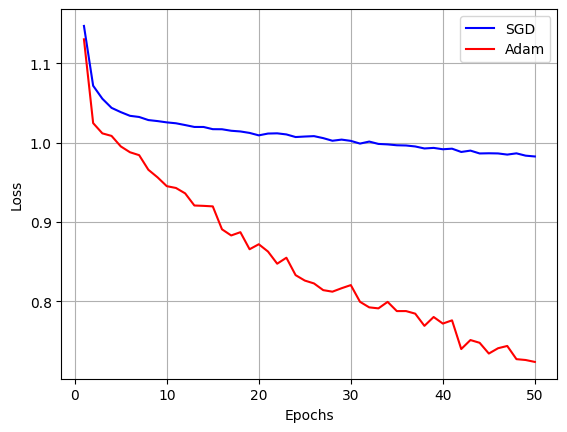

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers
import numpy as np
import matplotlib.pyplot as plt

def create_data():
  X=np.random.randn(1000,10)
  y=np.random.randn(1000,1)
  return X,y

def create_model():
  model=models.Sequential([
      layers.Dense(10,activation="relu",input_shape=(10,)),
      layers.Dense(20,activation="relu"),
      layers.Dense(1)
  ])
  return model

def train_model_with_history(model,optimizer,X,y,batch_size,epochs,optimizer_name):
  model.compile(optimizer=optimizer,loss='mean_squared_error')
  history=[]
  for epoch in range(epochs):
    hist=model.fit(X,y,batch_size=batch_size,epochs=1,verbose=0)
    loss=hist.history['loss'][0]
    history.append(loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")
  return history

X,y=create_data()
model_sgd=create_model()
model_adam=create_model()

optimizer_sgd=optimizers.SGD(learning_rate=0.01)
optimizer_adam=optimizers.Adam(learning_rate=0.01)
epochs=50
batch_size=32

print("\nTraining with SGD:")
loss_sgd=train_model_with_history(model_sgd,optimizer_sgd,X,y,batch_size,epochs,"SGD")
print("\nTraining with Adam:")
loss_adam=train_model_with_history(model_adam,optimizer_adam,X,y,batch_size,epochs,"Adam")

plt.plot(range(1,epochs+1),loss_sgd,label='SGD',color='blue')
plt.plot(range(1,epochs+1),loss_adam,label='Adam',color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7115 - loss: 0.8399 - val_accuracy: 0.9862 - val_loss: 0.0534
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.9649 - loss: 0.1423 - val_accuracy: 0.9900 - val_loss: 0.0407
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9780 - loss: 0.0957 - val_accuracy: 0.9923 - val_loss: 0.0331
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9830 - loss: 0.0704 - val_accuracy: 0.9919 - val_loss: 0.0437
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9854 - loss: 0.0654 - val_accuracy: 0.9877 - val_loss: 0.0614
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9882 - loss: 0.0520 - val_accuracy: 0.9921 - val_loss: 0.0403
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9887 - loss: 0.0489 - val_accuracy: 0.9899 - val_loss: 0.0517
Epoch 8/10
1875/1875 ━━━━━━━━━━━

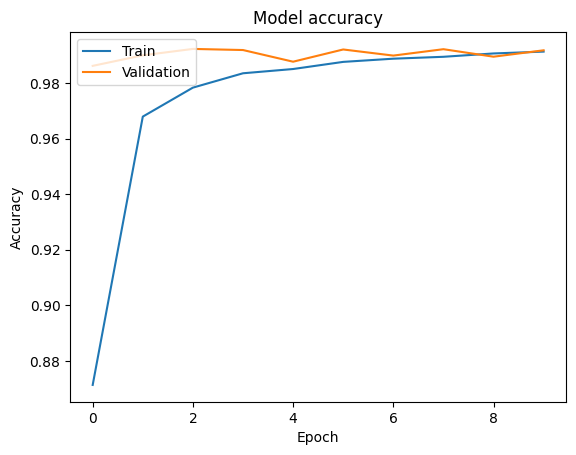

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
#load and preprocess the mnist dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data( )
train_images= train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



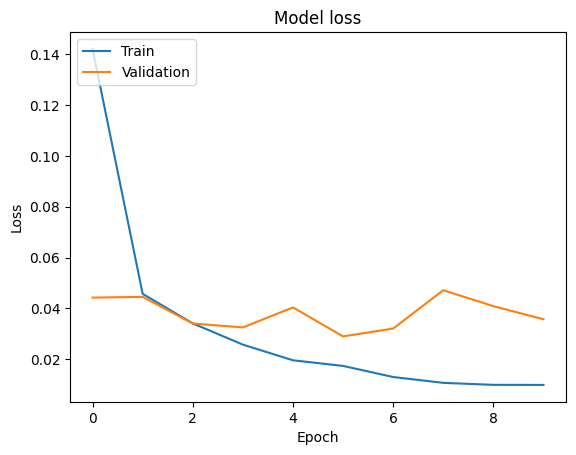

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from functools import partial
from tensorflow import keras
DefaultConv2D=partial(keras.layers.Conv2D,kernel_size=3,activation="relu",padding="SAME")
model=keras.models.Sequential([
    DefaultConv2D(filters=64,kernel_size=7,input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10,activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7083 - loss: 0.8569 - val_accuracy: 0.9865 - val_loss: 0.0552
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9707 - loss: 0.1226 - val_accuracy: 0.9904 - val_loss: 0.0377
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9803 - loss: 0.0833 - val_accuracy: 0.9885 - val_loss: 0.0517
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9842 - loss: 0.0689 - val_accuracy: 0.9885 - val_loss: 0.0534
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9857 - loss: 0.0638 - val_accuracy: 0.9916 - val_loss: 0.0405
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9886 - loss: 0.0510 - val_accuracy: 0.9907 - val_loss: 0.0404
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9900 - loss: 0.0422 - val_accuracy: 0.9905 - val_loss: 0.0397
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9902 - loss: 0

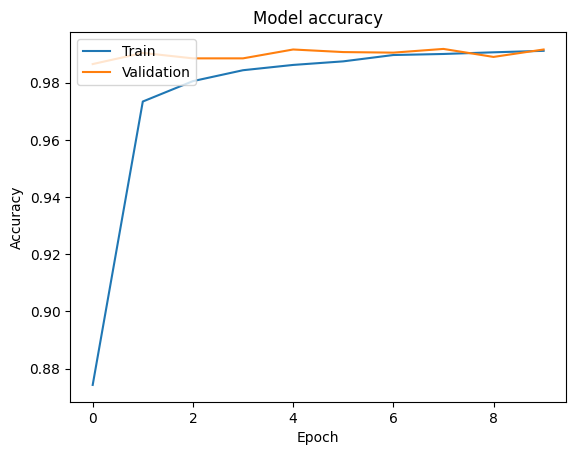

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
#load and preprocess the mnist dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data( )
train_images= train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
from functools import partial
DefaultConv2D=partial(keras.layers.Conv2D,kernel_size=3,activation="relu",padding="SAME")
model=keras.models.Sequential([
    DefaultConv2D(filters=64,kernel_size=7,input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10,activation="softmax")
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import keras

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')
class Residualunit(keras.layers.Layer):
    def __init__(self,filters,strides=1,activation='relu',**kwargs):
        super().__init__(**kwargs)
        self.activation=keras.activations.get(activation)
        self.main_layers=[
            keras.layers.Conv2D(filters, kernel_size=3, strides=strides,padding='same'),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, kernel_size=3, padding='same'),
            keras.layers.BatchNormalization()
        ]
        self.skip_layers=[]
        if strides>1:
            self.skip_layers=[
                keras.layers.Conv2D(filters,kernel_size=1,strides=strides,padding='same'),
                keras.layers.BatchNormalization()
            ]
    def call(self,inputs):
        z=inputs
        for layer in self.main_layers:
            z=layer(z)
        skip_z=inputs
        for layer in self.skip_layers:
            skip_z=layer(skip_z)
        return self.activation(z+skip_z)

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64,kernel_size=7,strides=2,padding='same',input_shape=[28,28,1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2,padding='same'))
prev_filters=64
for filters in [64]*3+[128]*4+[256]*6+[512]*3:
    strides=1 if filters==prev_filters else 2
    model.add(Residualunit(filters,strides=strides))
    prev_filters=filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10,activation='softmax'))

model.add(DefaultConv2D(64,kernel_size=7,strides=2,input_shape=[224,224,3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2,padding='same'))
prev_filters=64
for filters in [64]*3+[128]*4+[256]*6+[512]*3:
    strides=1 if filters==prev_filters else 2
    model.add(Residualunit(filters,strides=strides))
    prev_filters=filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'DefaultConv2D' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Define a residual unit
class ResidualUnit(tf.keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = tf.keras.activations.get(activation)

        # Main path
        self.main_layers = [
            layers.Conv2D(filters, kernel_size=3, strides=strides, padding='same'),
            layers.BatchNormalization(),
            self.activation,
            layers.Conv2D(filters, kernel_size=3, strides=1, padding='same'),
            layers.BatchNormalization(),
        ]

        # Skip path (for matching dimensions when strides > 1)
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same'),
                layers.BatchNormalization()
            ]

    def call(self, inputs):
        # Main path
        z = inputs
        for layer in self.main_layers:
            z = layer(z)

        # Skip path
        skip_z = inputs
        for layer in self.skip_layers:
            skip_z = layer(skip_z)

        return self.activation(z + skip_z)

# Build the model
model = models.Sequential()

# Initial Conv2D layer
model.add(layers.Conv2D(64, kernel_size=7, strides=2, input_shape=[28, 28, 1]))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.MaxPool2D(pool_size=3, strides=2, padding="same"))

# Add residual blocks
prev_filters = 64
for filters in [64]*3 + [128]*4 + [256]*6 + [512]*3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters

# Global average pooling and output layers
model.add(layers.GlobalAvgPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(optimizer=optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Training the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_112 (Conv2D)                  │ (None, 11, 11, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_109              │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit (ResidualUnit)         │ (None, 6, 6, 64)            │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_1 (ResidualUnit)       │ (None, 6, 6, 64)            │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_2 (ResidualUnit)       │ (None, 6, 6, 64)            │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_3 (ResidualUnit)       │ (None, 3, 3, 128)           │         231,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_4 (ResidualUnit)       │ (None, 3, 3, 128)           │         296,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_5 (ResidualUnit)       │ (None, 3, 3, 128)           │         296,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_6 (ResidualUnit)       │ (None, 3, 3, 128)           │         296,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_7 (ResidualUnit)       │ (None, 2, 2, 256)           │         921,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_8 (ResidualUnit)       │ (None, 2, 2, 256)           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_9 (ResidualUnit)       │ (None, 2, 2, 256)           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_10 (ResidualUnit)      │ (None, 2, 2, 256)           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_11 (ResidualUnit)      │ (None, 2, 2, 256)           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_12 (ResidualUnit)      │ (None, 2, 2, 256)           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_13 (ResidualUnit)      │ (None, 1, 1, 512)           │       3,677,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_14 (ResidualUnit)      │ (None, 1, 1, 512)           │       4,723,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_15 (ResidualUnit)      │ (None, 1, 1, 512)           │       4,723,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │              

 Total params: 21,309,066 (81.29 MB)

 Trainable params: 21,292,042 (81.22 MB)

 Non-trainable params: 17,024 (66.50 KB)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 42ms/step - accuracy: 0.9028 - loss: 0.3761 - val_accuracy: 0.8448 - val_loss: 0.5773
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9768 - loss: 0.0788 - val_accuracy: 0.9679 - val_loss: 0.1093
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9863 - loss: 0.0510 - val_accuracy: 0.8110 - val_loss: 0.7081
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9880 - loss: 0.0432 - val_accuracy: 0.9555 - val_loss: 0.1638
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9880 - loss: 0.0424 - val_accuracy: 0.9750 - val_loss: 0.0785
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9870 - loss: 0.0449 - val_accuracy: 0.9868 - val_loss: 0.0474
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9904 - loss: 0.0313 - val_accuracy: 0.9901 - val_loss: 0.0351
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9923 - loss: 0.0254 - 

In [ ]:
!pip install torch torchvision


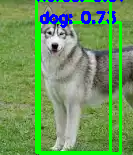

In [ ]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle',
    'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def detect_objects(image_path, confidence_threshold=0.5):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None

    original_image = image.copy()
    image_tensor = F.to_tensor(image)

    # Perform inference
    with torch.no_grad():
        predictions = model([image_tensor])

    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return original_image

if __name__ == "__main__":
    IMAGE_PATH = "/content/download (1).webp"  # Replace with your image path
    detected_image = detect_objects(IMAGE_PATH)

    # Display the output
    if detected_image is not None:
        cv2_imshow(detected_image)

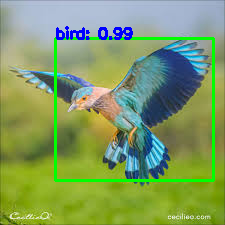

In [25]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle',
    'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'baby', 'bird', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def detect_objects(image_path, confidence_threshold=0.5):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None

    original_image = image.copy()
    image_tensor = F.to_tensor(image)

    # Perform inference
    with torch.no_grad():
        predictions = model([image_tensor])

    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    # The for loop was incorrectly indented
    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            # Check if the label index is within the range
            label_index = labels[i]

            #Handle labels outside the range
            label = COCO_INSTANCE_CATEGORY_NAMES[label_index] if label_index < len(COCO_INSTANCE_CATEGORY_NAMES) else f"unknown ({label_index})"

            score = scores[i]
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return original_image

if __name__ == "__main__":
    IMAGE_PATH = "/content/download (2).jpg"  # Replace with your image path
    detected_image = detect_objects(IMAGE_PATH)

    # Display the output
    if detected_image is not None:
        cv2_imshow(detected_image)